  impost os means - list the contend of directry listed in file path given  
we will do analysis of sales customer eg (city,age,gender,stability,occupation,product)   
motive to do prpoper analysis so that marketing team can take action accordingly

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\DELL\AppData\Local\Temp\ipykernel_9420\2752214927.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


0=unmarried  
1=merried

In [5]:
#give info about data set
data.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [6]:
data.dtypes.value_counts()
#this will show the value count of datatype

int64      5
object     5
float64    2
dtype: int64

In [7]:
data.shape
#this output means it has 550068 rows and 12 columns

(550068, 12)

In [8]:
data.columns
#this output will show name of columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
data.index
#this output willshow where shart from and where finish rows

RangeIndex(start=0, stop=550068, step=1)

In [10]:
data.isnull().sum()
#this will show the number of null value in any column

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<Axes: >

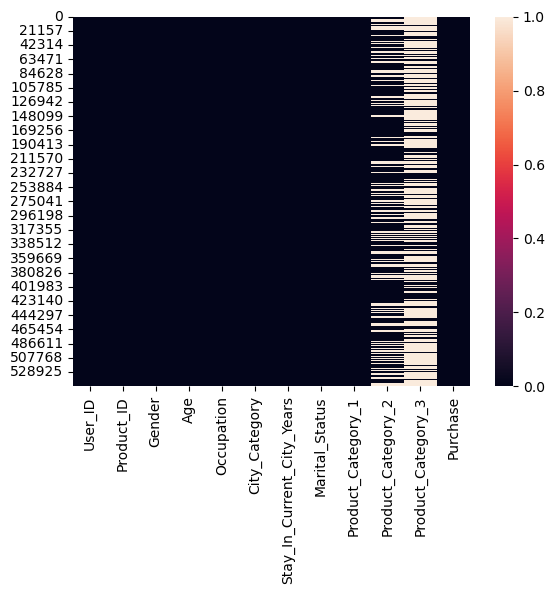

In [11]:
sns.heatmap(data.isnull())
#thi output will show heatmap of all column relation
#as u can see there is white line which show the null max white means max null
#product_category_2 and product_category_3 has large no of null value

In [12]:
data.isnull().sum().sum()
#finding total null value in data set

556885

In [13]:
data.duplicated().sum()
#output will show the dublictae value in data set
#as u can the output is zero means to dublicate vale

0

In [14]:
#RENAMING THE COLUMNS
data.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Stay_In_Current_City_Years':'city', 'Marital_Status':'maritial', 'Product_Category_1':'product1','Product_Category_2':'product2', 'Product_Category_3':'product3',},inplace=True)
data.head()
#as u can see we rename the coulumn 
#if we use implace true it will not do a copy
#if we use false then it will do a cody of dataset and then change

,UserID,ProductID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


1.To delete purmanently we use inplace=True  

2.and for just experiment purupose we use inplaec=False (means only for that current cell no permanent delete)   

3.or otherwise bcz it by default false   

4. or else we can assign new variable (mean it will create new copy of modify data)

In [15]:
#droping out unnecssary columns 
data.drop(['ProductID'],inplace=True,axis='columns')


In [16]:
data.head()
#as u can see productid column is deleted

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


# DATA CLEANING

In [17]:
#CLEANING INDIVIDUAL COLUMNS
data['city'].unique()
#this will show all unique value in column of city

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
def cities(value):
    if isinstance(value, int):  # Check if the value is already an integer
        return value
    elif '+' in value:
        value = value.replace('+', '')
    return int(value)

data['city'] = data['city'].apply(cities)

# try:
    # Your code that may raise an error
# except Exception as e:
    
#     pass  # You can choose to do something else here or simply use 'pass' to ignore the error silently


In [19]:
data['city'].unique()

array([2, 4, 3, 1, 0])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [21]:
data['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [22]:
data['UserID'].dtype

dtype('int64')

In [23]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
data.head()

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4,0,8,NaN,NaN,7969


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [26]:
def ages(value): #taken age columns and value means taken varieble
    if'0-17' in value:
        value=value.replace('0-17','child') #for long loop use(if ,elif, else)
        return str(value)
    elif '26-35' in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25' in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
    
    
data['Age']=data['Age'].apply(ages)


In [27]:
data['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [28]:
data['Occupation'].unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [29]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
data['maritial'].unique()

array([0, 1])

In [31]:
data[['UserID','maritial']].tail()

,UserID,maritial
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


In [32]:
data['product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [33]:
data['product2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: product2, dtype: int64

It mens there is less value in 7

In [34]:
data['product2'].isnull().value_counts()

False    376430
True     173638
Name: product2, dtype: int64

In [35]:
#removing the percentage of null data in product2
(data['product2'].isnull().sum() / len(data)) * 100

31.56664266963357

31.5% of data is null

In [36]:
s=data.groupby('Age')['product2'].agg(pd.Series.mode)
s
#as u can see age wise how many no of product buy 

Age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: product2, dtype: float64

Groupby function is very important for data analysis within comparing bifferent colums with different column

In [37]:
#we will be filling null value in product2
for key in s.index:
    data.loc[(data['Age']==key) & (data['product2'].isnull()), 'product2']=s[key]
key

'teenage'

In [38]:
data['product2'].isnull().sum()

0

In [39]:
data['product3'].value_counts()


16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: product3, dtype: int64

In [40]:
#removing the percentage of null data in product3
(data['product3'].isnull().sum() / len(data)) * 100

69.67265865311198

product3 contain 69% of null value

In [41]:
#removing the mode of product 3
p=data.groupby('Age')['product3'].agg(pd.Series.mode)
p

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: product3, dtype: float64

In [42]:
for key in p.index:
    data.loc[(data['Age']==key) & (data['product3'].isnull()), 'product3']=p[key]

key
#output means null value contain in teenage KEY 

'teenage'

In [43]:
data['product3'].isnull().sum()

0

AFTER CLEANING CHECKING DATA

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [45]:
data.isnull().sum()

UserID           0
Gender           0
Age              0
Occupation       0
City_Category    0
city             0
maritial         0
product1         0
product2         0
product3         0
Purchase         0
dtype: int64

No null value present now data is clean and now do analysis

<Axes: >

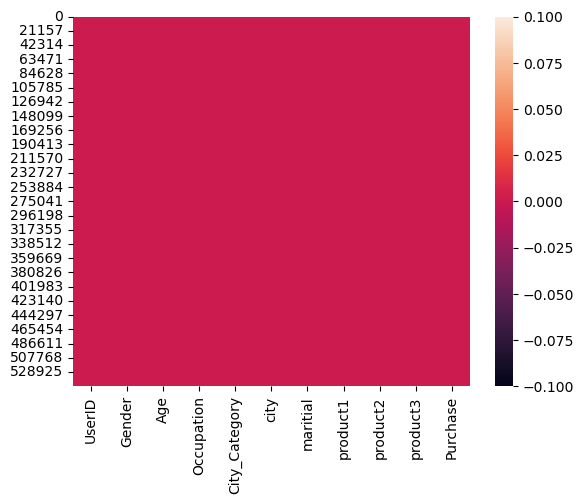

In [46]:
sns.heatmap(data.isnull())

# DATA VISUALIZATION

For data visuliztion we are using Seaborn and matplotlib

<Axes: title={'center': 'age vs purchase'}, xlabel='Age', ylabel='Purchase'>

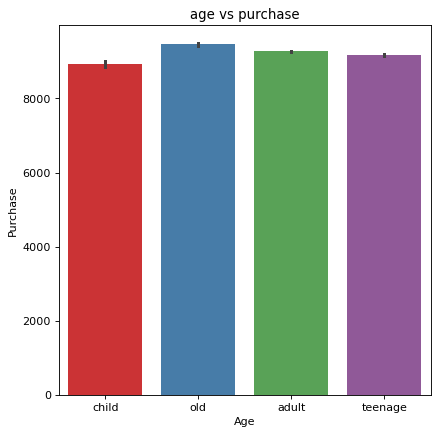

In [47]:
# Age vs purshased
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=data,palette='Set1')


Here we understood that old age has higest purchase and chil has lower purchase

<Axes: title={'center': 'Gander'}, xlabel='Gender', ylabel='count'>

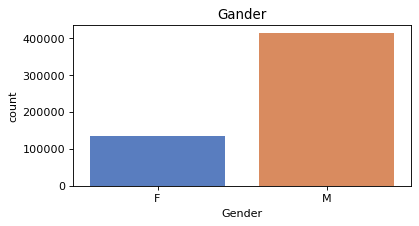

In [48]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1) #this 4= length, 2 = breadth, and 1 is the posiiton of graph
plt.title('Gander')
sns.countplot(x='Gender',data=data,palette='muted')

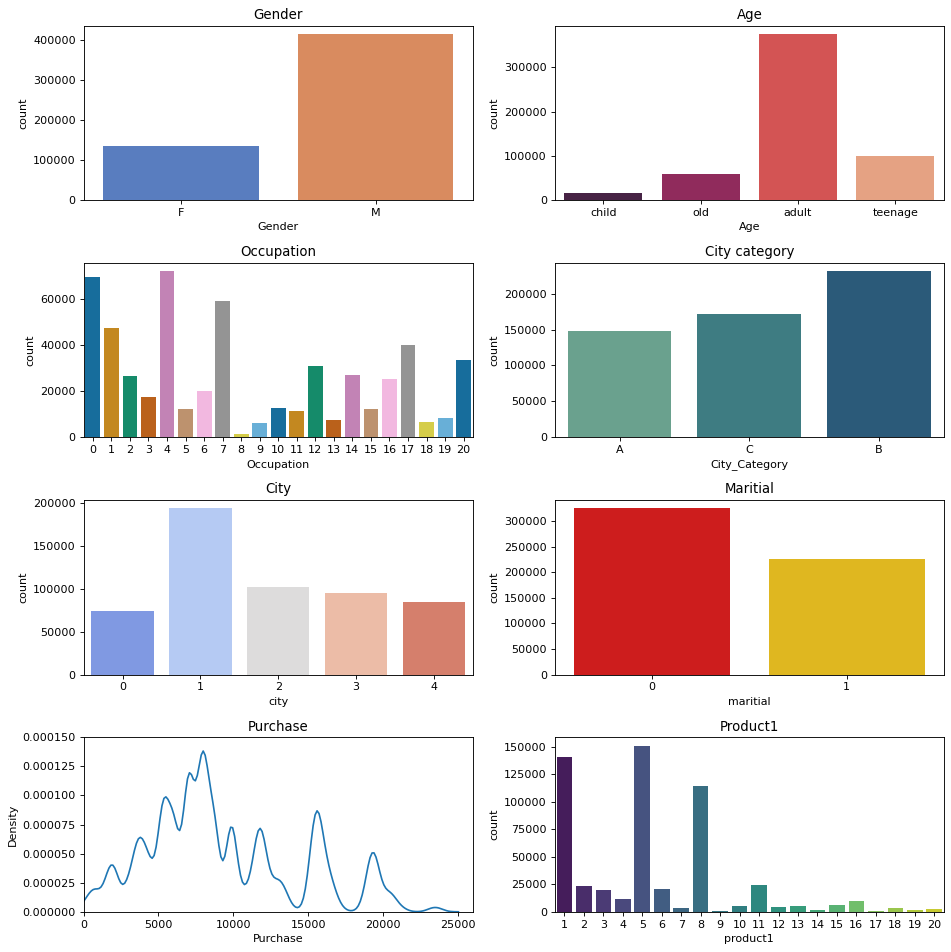

In [49]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=data,palette='muted')

plt.subplot(4,2,2)
plt.title('Age')
sns.countplot(x='Age',data=data,palette='rocket')

plt.subplot(4,2,3)
plt.title('Occupation')
sns.countplot(x='Occupation',data=data,palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(x='City_Category',data=data,palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(x='city',data=data,palette='coolwarm')

plt.subplot(4,2,6)
plt.title('Maritial')
sns.countplot(x='maritial',data=data,palette='hot')

ax=plt.subplot(4,2,7)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(x='Purchase', data=data) #this is waves type plot or line graph

plt.subplot(4,2,8)
plt.title('Product1')
sns.countplot(x='product1',data=data,palette='viridis')

plt.tight_layout() #this is given for adjustment of graph so no overlap done
plt.show()  

Gender:-
The graph shows that count of male is more than female.
Male count=4000
Female count=1500 

Age:-
The graph shows that pepople visiting the store are maximum adults.
Adult age ranges from 26-50
Where as least visited are children.   

Maritial:-
People visting the store are married and has higher count as compared to singles.
Married count = 3,00,000
Single count=2,00,000

Purchase:-
Purchase rate is higher between 5000 - 10,000
Purchase rate goes upto range 25,0000   

City category:-
People visiting the store maximum belong to city category B.
Least visiting people visiting the store belong to category A.  

City:-
Maximum people visiting the store belong to 1.
Least visited is city 0.
By this we can conclude that the store is located in city 1.

occupation-
as u can see who has 4 occupation at a time are maximum   
and low occupation who has 8 occupation at a time   

product1- 
as u can see 5 has maximun sales
and 27 has minmum sales


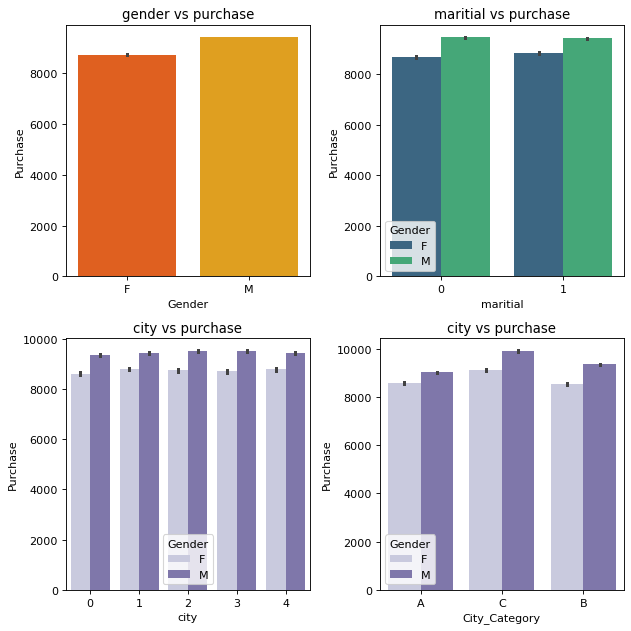

In [50]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=data,palette='autumn')

plt.subplot(2,2,2)                                                #size
plt.title('maritial vs purchase')                                 #title
sns.barplot(x='maritial',y='Purchase',data=data,hue='Gender',palette='viridis')#type of graph and axis
 
plt.subplot(2,2,3)   #graph always plot using sns means seaborn library
plt.title('city vs purchase') 
sns.barplot(x='city', y='Purchase',data=data,hue='Gender',palette='Purples')

plt.subplot(2,2,4)  #palette is for color 
plt.title('city vs purchase') #(hue= 'Gender') means comparision on basis of gender as u can see 2 bar plot at one things
sns.barplot(x='City_Category', y='Purchase',data=data,hue='Gender',palette='Purples')

plt.tight_layout() #this line is for to avoid overlaping of graph
plt.show()




By these 3 ploted graph we conclude that male has higher purchase rate than female   
area , city_category , gender wise male has high purchase    
male > female(purchase)

<Axes: title={'center': 'matertial status vs purchase'}, xlabel='maritial', ylabel='Purchase'>

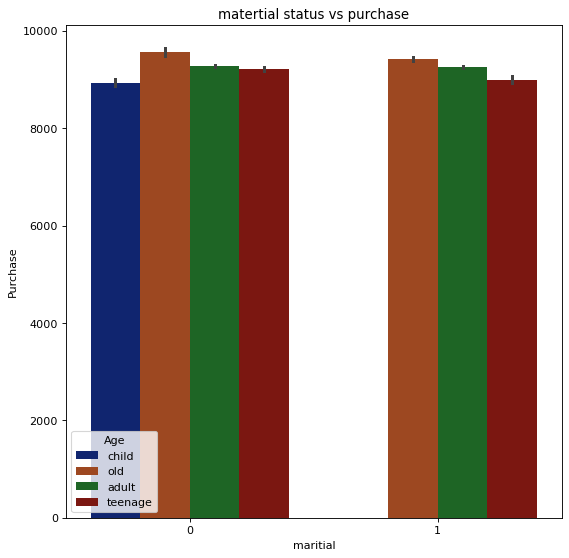

In [51]:
#plotting purchase vs product1
plt.figure(figsize=(8,8),dpi=80)
plt.title('matertial status vs purchase')
sns.barplot(x='maritial', y='Purchase',data=data,palette='dark',hue="Age")

This graph we come to know that purchase rate is more in singles rather than in married.   
In singles purchase rate of old age is lower where as in married purchase rate of old is higher. 

,Age
Age,
adult,375301
child,15102
old,60005
teenage,99660


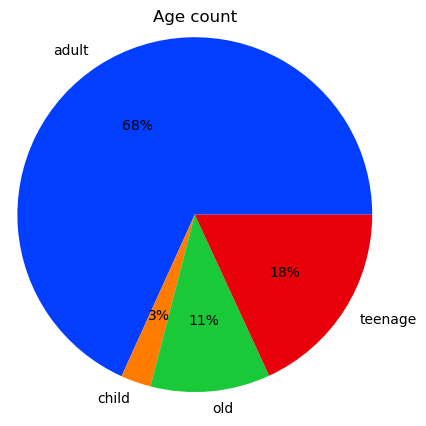

In [52]:
#Age Count
a=data.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(a,colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()
#autopct='%.0f%%') this means the % of label to display whole number

Maximum people visiting the store are from adult category.    
Least people visiting belong to child category

,City_Category
City_Category,
A,147720
B,231173
C,171175


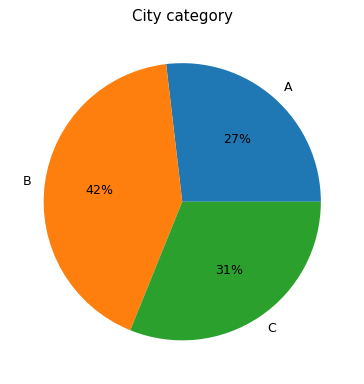

In [53]:
#city category
plt.figure(figsize=(5,5),dpi=90)
plt.title('City category')
palette_color=sns.color_palette('bright')
b=data.groupby('City_Category')['City_Category'].agg('count')
display(b.to_frame())
plt.pie(b,labels=b.index,autopct='%.0f%%')
plt.show()

People visting the store belong to city category B.    
Least visiting belong to city A.

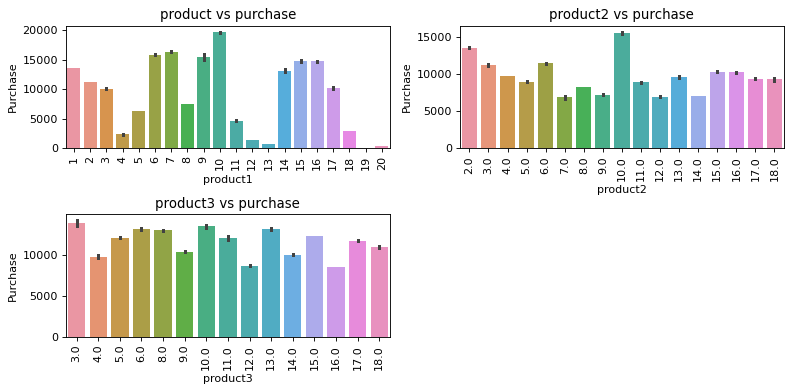

In [54]:
#Plotting product vs purchase rate
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(2,2,1)
plt.title('product vs purchase')
sns.barplot(x='product1',y='Purchase',data=data)
plt.xticks(rotation=90)  #Rotate command is used to rotate label which given below x axis or writen word

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='product2', y='Purchase', data= data)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='product3',y='Purchase',data=data)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


In this graph of product1 and product2 the 10th product is more purchased.    
In product3 3rd product is more purchased compared to all.

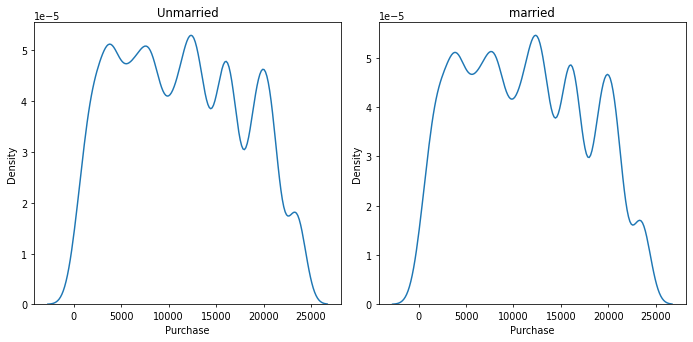

In [55]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
um=data[data['maritial']==0].value_counts('Purchase') #um=unmarried is a variable
plt.title('Unmarried')
sns.kdeplot(x='Purchase',data=um)

plt.subplot(1,2,2)
m=data[data['maritial']==1].value_counts('Purchase')
plt.title('married')
sns.kdeplot(x='Purchase',data=m) #kdeplot used in seaborn it a type of graph like standard devation or wave type

plt.tight_layout()
plt.show()

Purchase distribution of both 'Married' and 'UnMarried' customers are quitely same.

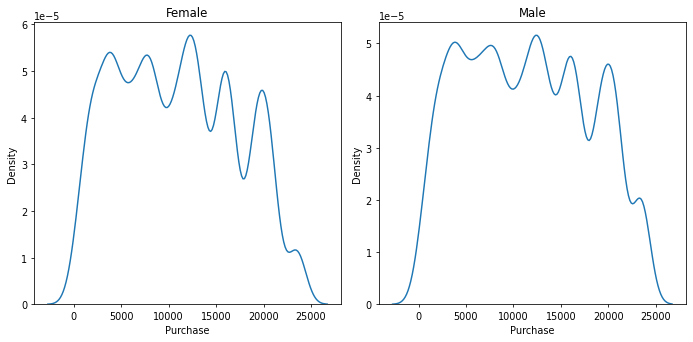

In [56]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
f=data[data['Gender']=='F'].value_counts('Purchase')
plt.title('Female')
sns.kdeplot(x='Purchase',data=f)

plt.subplot(1,2,2)
ma=data[data['Gender']=='M'].value_counts('Purchase')
plt.title('Male')
sns.kdeplot(x='Purchase',data=ma)

plt.tight_layout()
plt.show()



Purchase distribution of both 'Male' and 'Female' customers are quitely same

# Conclusion

Both male and female has same sales 


# Building Model

build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. By seeing this EDA we can fulfill this requirements.

# THE END